# 잔차 분석
## 잔차분석은 회귀모형에 대한 가정(정규성, 등분산성, 독립성, ...)을 충족하는지에 대한 검정
## 이상치가 개입하는지에 대한 검정을 하는 절차


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
df= pd.read_csv('dptest1.csv', header=0)
# DALYs Mental disorders 넣어서 모델 만들기, 
# year, epression 제외
df.rename(columns={"Country name": "Country", "year":"Year","Life Ladder":"Happiness_Score", "Log GDP per capita":"Economy", 
                  "Social support":"Society" , "Healthy life expectancy at birth":"Health", "Freedom to make life choices":"Freedom",
                  "alcohol disorders":"Alcohol", "suicide rates":"Suicide", "Perceptions of corruption":"Corruption", "DALYs Mental disorders":"Mental"}, inplace=True)
model = ols("Happiness_Score~ Economy + Generosity+ Society + Health + Freedom + Corruption + schooling+ Alcohol+ Suicide + Obesity+ Fertility + Mental", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     519.4
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:39:30   Log-Likelihood:                -1527.7
No. Observations:                1897   AIC:                             3081.
Df Residuals:                    1884   BIC:                             3153.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7065      0.364    -10.182      0.000      -4.420      -2.992
Economy        0.4394      0.027     16.358      0.000       0.387       0.492
Generosity     0.5846      0.089      6.585      0.000       0.410       0.759
Society        2.2493      0.157     14.361      0.000       1.942       2.556
Health         0.0378      0.005      8.125      0.000       0.029       0.047
Freedom        1.0374      0.114      9.126      0.000       0.814       1.260
Corruption    -0.3448      0.088     -3.918      0.000      -0.517      -0.172
schooling     -0.0094      0.008     -1.177      0.239      -0.025       0.006
Alcohol        0.0351      0.004      8.644      0.000       0.027       0.043
Suicide       -0.1080      0.020     -5.354      0.000      -0.148      -0.068
Obesity       -0.0190      0.004     -4.946      0.000      -0.027      -0.011
Fertility      0.1048      0.020      5.116      0.000       0.065       0.145
Mental         0.0657      0.013      5.096      0.000       0.040       0.091
==============================================================================
Omnibus:                       26.252   Durbin-Watson:                   0.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.506
Skew:                          -0.131   Prob(JB):                     2.64e-09
Kurtosis:                       3.657   Cond. No.                     1.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 1.  모형의 선형성
### 예측값(fitted)와 잔차(residual)을 비교
### 빨간 실선은 잔차의 추세를 나타낸다
### 빨간 실선이 점선에서 크게 벗어나면 예측값에 따라 잔차가 크게 달라진것으로 선형성이 없다는 것


C:\Users\CHA-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


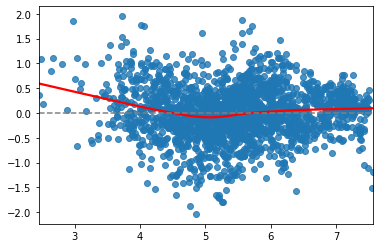

In [4]:
fitted= model.predict(df)
residual= df['Happiness_Score'] - fitted
sns.regplot(fitted, residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()], [0,0], '--', color='grey')


## 2. 잔차의 정규성
### 잔차가 정규분포를 따른다는 가정을 한다
### QQ Plot로 확인할 수 있다.
### 잔차가 정규분포를 띄면 QQ plot에서 점들이 점선을 따라 배치되어 있어야 한다

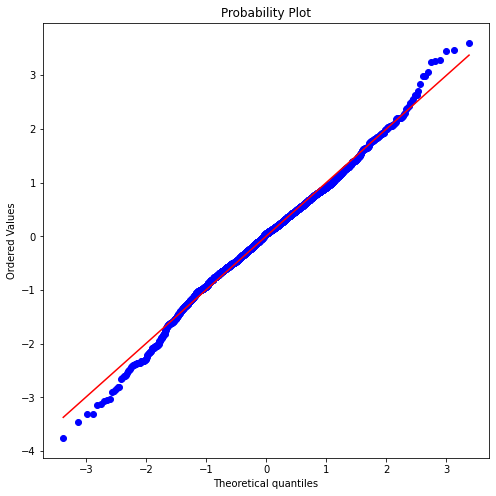

In [5]:
import scipy.stats
from scipy.stats import probplot 
sr = scipy.stats.zscore(residual)
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
probplot(sr, dist='norm',plot=ax) ## qq plot 출력
plt.show()


In [6]:
scipy.stats.shapiro(residual)


(0.9940014481544495, 5.890298666599847e-07)

## 3. 잔차의 등분산성
### 희귀모형을 통해 예측된 값이 어떻든지, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
### 예측값(X축)에 따라 잔차가 어떻게 달라지는지 보여줌
### 빨간색 실선이 수평선에 가까울수록 등분산성이 있다는 것

C:\Users\CHA-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

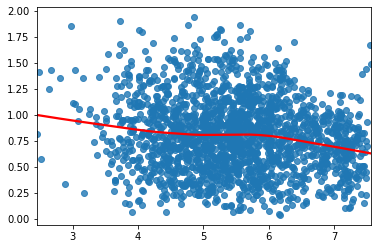

In [7]:
import numpy as np
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})


## 4. 잔차의 독립성
###  Result.summary의 Durbin-Watson(더빈왓슨, DW검정)으로 확인
### DW 검정은 잔차의 독립성을 확인할 수 있는 수치이다. 0이면 잔차들이 양의 자기상관을 갖고, 2이면 자기상관이 없는 독립성을 갖고
### 4이면 잔차들이 음의 자기상관을 갖는다고 해석한다
### 보통 1.5~2.5사이이면 독립으로 판단하고 회귀모형이 적합하다는 것을 의미한다. DW 검정값이 0또는 4에 가깝다는 것은 잔차들이
### 자기상관을 가지고 있다는 의미이고, 이는 t값,F값,R제곱을 실제보다 증가시켜 실제로 유으미하지 않은 결과를 유의미한 결과를 왜곡하게 되다
### 위 회귀분석에서 더빈왓슨검정 값이 0.618 이므로 독립성이 있다고 판단할 수 없다.

In [9]:
# 극단값
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(model).cooks_distance
cd.sort_values(ascending=False).head()

661     0.032388
1547    0.032289
1546    0.029028
1534    0.018536
660     0.014384
dtype: float64